# Distributions
I'm again using a selection from a data set with [Google Play apps](https://www.kaggle.com/lava18/google-play-store-apps/home).

For the visualizations in the course, I will be using the [Seaborn library](https://seaborn.pydata.org/index.html), which provides attractive and versatile graphs.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('googleplay.csv')
df.head()

,app,reviews,rating,size,price
0,JailBase - Arrests + Mugshots,17240,4.0,NaN,0.0
1,EF Smart English for Phone,208,3.5,13.0,0.0
2,CP Calculator,187,4.1,2.9,0.0
3,Workout Tracker & Gym Trainer - Fitness Log Book,5420,4.6,21.0,0.0
4,All Language Translator,29944,4.0,2.1,0.0


## What is a distribution?

A distribution is the set of values for a variable and their frequency. There are several ways to visualize a distribution, one of which is a histogram. Let's look at the distribution of file size.

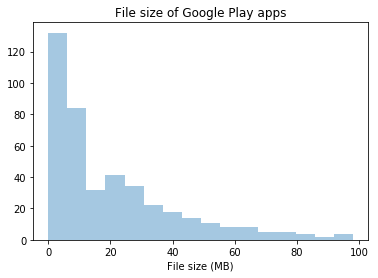

In [2]:
df['size'].name = 'File size (MB)' #Labeling the variable for plotting
file_size = df['size'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(file_size, kde=False) 
plt.title('File size of Google Play apps')
plt.show()

Some things to note about this distribution:
* It has 1 peak (or mode - *unimodal*)
* It has a 'tail' on the right (*right-skewed*)

When the distribution is right-skewed, the mean is higher than the median. Let's take a look at the mean and median and plot them in the graph

The median filesize is: 12.0 MB
The mean filesize is: 20.677150943396224 MB


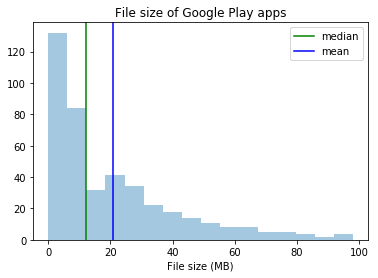

In [4]:
mean_size = df['size'].mean()
median_size = df['size'].median()

print(f'The median filesize is: {median_size} MB')
print(f'The mean filesize is: {mean_size} MB')

sns.distplot(file_size, kde=False)
plt.title('File size of Google Play apps')
plt.axvline(median_size, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.show()

Another way to visualize a distribution is using a density plot. This "smoothes" the distribution and actually provides a model of the underlying distribution of the population, which may or may not be correct. If we use ```sns.distplot()``` without ```kde=False``` (*K*ernel *D*ensity *E*stimate), we get both the histogram and the KDE.

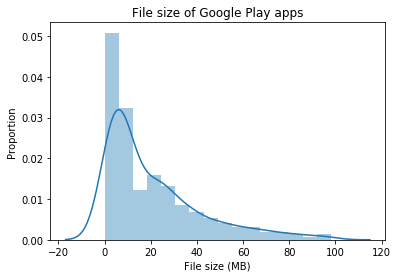

In [5]:
sns.distplot(file_size)
plt.title('File size of Google Play apps')
plt.ylabel('Proportion')
plt.show() 

As you can see, the KDE is smoother, but it also gives impossible values (which ones?). It can be useful to see the actual data. We can add ticks at the actual values by using ```rug=True```.

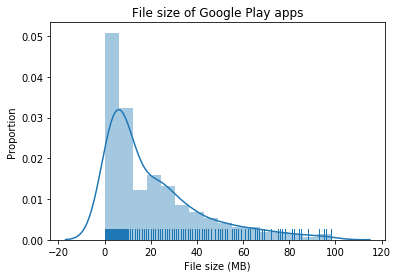

In [6]:
sns.distplot(file_size, rug=True)
plt.title('File size of Google Play apps')
plt.xlabel('File size (MB)')
plt.ylabel('Proportion')
plt.show()

Now for a boxplot of ratings. As you can see, ratings are *left-skewed*. Most apps average 4.0-4.5 stars.

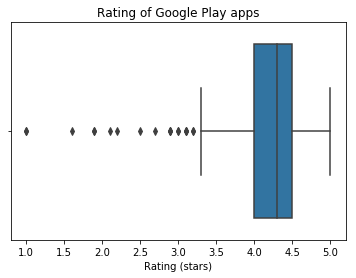

In [12]:
sns.boxplot(df['rating'])
plt.title('Rating of Google Play apps')
plt.xlabel('Rating (stars)')
plt.show()

A violin plot is a combination of a density plot and a boxplot (the black bar is the boxplot). Let's make a plot of the price of apps. Let's exclude free apps; they would make the graph rather useless because most apps are free. Let's also add the actual data by adding a 'swarmplot'.

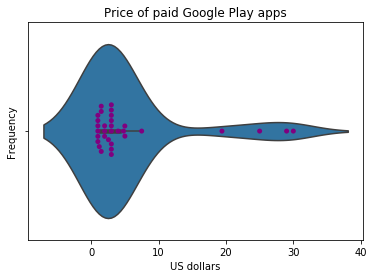

In [7]:
df_paid = df[df['price'] > 0] #Subsetting the dataframe to include only paid apps
sns.violinplot(df_paid['price'])
sns.swarmplot(df_paid['price'], color='purple') #default color doesn't stand out
plt.title('Price of paid Google Play apps')
plt.ylabel('Frequency')
plt.xlabel('US dollars')
plt.show()

Though the sample is small, the distribution appears to be *bimodal*: there is a large group of cheap apps, and then there is a small number of expensive apps.